# Personalized Medical Recomendation System with machine learning

# Load datasets and tools.

In [110]:
import pandas as pd

In [111]:
df = pd.read_csv("../datasets/Training.csv")

In [112]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


## Data cleaning & noise injection

In [113]:
import numpy as np

def add_noise(X, noise_level=0.1):
    """
    Add noise to the dataset by randomly flipping a fraction of the binary 1s to 0s.
    noise_level: Proportion of features to randomly flip.
    """
    X_noisy = X.copy()
    n_samples, n_features = X_noisy.shape
    n_flips = int(noise_level * n_samples * n_features)

    for _ in range(n_flips):
        sample_idx = np.random.randint(0, n_samples)
        feature_idx = np.random.randint(0, n_features)
        
        # Only flip 1s to 0s (simulate missing symptom)
        if X_noisy[sample_idx, feature_idx] == 1:
            X_noisy[sample_idx, feature_idx] = 0  # Flip the binary value to simulate missing symptom

    return X_noisy

# Set noise level
noise_level = 0.1  # 10% of the 1s will be flipped to 0s

# Apply noise to the training and testing datasets
X_train_noisy = add_noise(X_train, noise_level=noise_level)
X_test_noisy = add_noise(X_test, noise_level=noise_level)

# Print confirmation
print("Noise added to the dataset.")


Noise added to the dataset.


In [114]:
df.shape

(4920, 133)

In [115]:
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [116]:
# Check for missing values
print(f"Missing Values:\n{df.isnull().sum()}")

Missing Values:
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


In [117]:
# Check for data types
print(f"Data Types:\n{df.dtypes}")

Data Types:
itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object


In [118]:
# Check the distribution of the target variable
print(f"Class Distribution:\n{df['prognosis'].value_counts()}")

Class Distribution:
prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                   

## Data Encoding, Feature Engineering, and Data Splitting:

In [119]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Encode the 'prognosis' column (target variable)
label_encoder = LabelEncoder()
df['prognosis'] = label_encoder.fit_transform(df['prognosis'])

# You can check the mapping of classes to their encoded labels
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"Class Mapping:\n{class_mapping}")

# Step 2: Feature Scaling (Optional but recommended)
# We'll use StandardScaler to scale the features to have mean = 0 and std deviation = 1
scaler = StandardScaler()

# Separate features (X) and target (y)
X = df.drop('prognosis', axis=1)  # Features
y = df['prognosis']               # Target

# Scale the features (only if necessary, especially for distance-based models)
X_scaled = scaler.fit_transform(X)

Class Mapping:
{'(vertigo) Paroymsal  Positional Vertigo': 0, 'AIDS': 1, 'Acne': 2, 'Alcoholic hepatitis': 3, 'Allergy': 4, 'Arthritis': 5, 'Bronchial Asthma': 6, 'Cervical spondylosis': 7, 'Chicken pox': 8, 'Chronic cholestasis': 9, 'Common Cold': 10, 'Dengue': 11, 'Diabetes ': 12, 'Dimorphic hemmorhoids(piles)': 13, 'Drug Reaction': 14, 'Fungal infection': 15, 'GERD': 16, 'Gastroenteritis': 17, 'Heart attack': 18, 'Hepatitis B': 19, 'Hepatitis C': 20, 'Hepatitis D': 21, 'Hepatitis E': 22, 'Hypertension ': 23, 'Hyperthyroidism': 24, 'Hypoglycemia': 25, 'Hypothyroidism': 26, 'Impetigo': 27, 'Jaundice': 28, 'Malaria': 29, 'Migraine': 30, 'Osteoarthristis': 31, 'Paralysis (brain hemorrhage)': 32, 'Peptic ulcer diseae': 33, 'Pneumonia': 34, 'Psoriasis': 35, 'Tuberculosis': 36, 'Typhoid': 37, 'Urinary tract infection': 38, 'Varicose veins': 39, 'hepatitis A': 40}


# Training

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [122]:
print(f"Training Set Shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing Set Shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training Set Shape: X_train: (3936, 132), y_train: (3936,)
Testing Set Shape: X_test: (984, 132), y_test: (984,)


## Feature Engineering

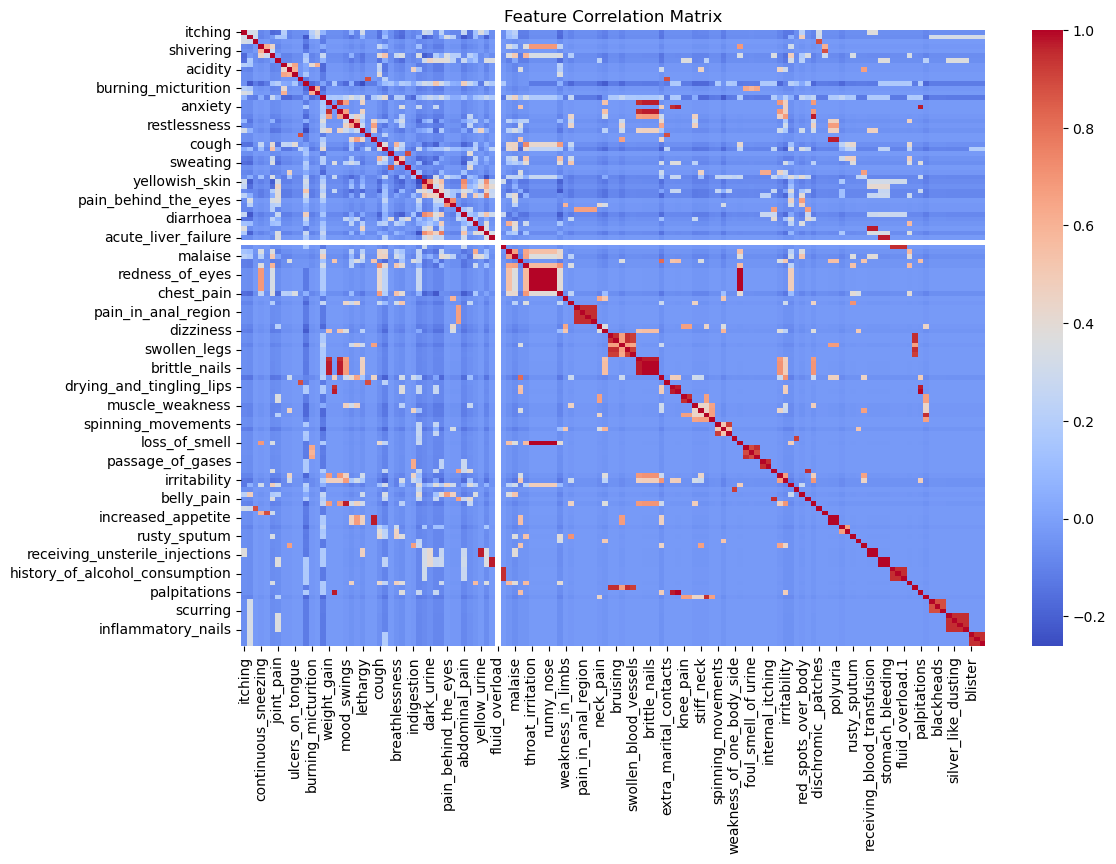

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix for the features
correlation_matrix = pd.DataFrame(X).corr()

# Visualize the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

## Training top models

In [124]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Function to introduce noise into the dataset
def add_noise(X, noise_level=0.1):
    X_noisy = X.copy()
    n_samples, n_features = X_noisy.shape
    n_flips = int(noise_level * n_samples * n_features)

    for _ in range(n_flips):
        sample_idx = np.random.randint(0, n_samples)
        feature_idx = np.random.randint(0, n_features)
        
        if X_noisy[sample_idx, feature_idx] == 1:
            X_noisy[sample_idx, feature_idx] = 0  # Flip 1 to 0 to simulate missing symptom

    return X_noisy

# Apply noise to the training and testing datasets
noise_level = 0.3  # 10% noise level
X_train_noisy = add_noise(X_train, noise_level=noise_level)
X_test_noisy = add_noise(X_test, noise_level=noise_level)

print("Noise added to the dataset.")

# Initialize MinMaxScaler to transform features to the range [0, 1] for MultinomialNB
scaler = MinMaxScaler()

# Scale the noisy datasets for MultinomialNB
X_train_noisy_scaled = scaler.fit_transform(X_train_noisy)
X_test_noisy_scaled = scaler.transform(X_test_noisy)

# Define models, using the scaled data for MultinomialNB
models = {
    "SVC": SVC(kernel='linear'),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNeighbors": KNeighborsClassifier(n_neighbors=5),
    "MultinomialNB": MultinomialNB()  # MultinomialNB will use the scaled data
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name} on noisy data...")
    
    if model_name == "MultinomialNB":
        # Train and test MultinomialNB on the scaled noisy data
        model.fit(X_train_noisy_scaled, y_train)
        predictions = model.predict(X_test_noisy_scaled)
    else:
        # Train and test other models on the unscaled noisy data
        model.fit(X_train_noisy, y_train)
        predictions = model.predict(X_test_noisy)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Classification Report: Contains Precision, Recall, F1-Score
    report = classification_report(y_test, predictions)
    
    # Print results
    print(f"{model_name} Accuracy on Noisy Data: {accuracy:.4f}")
    print(f"{model_name} Confusion Matrix on Noisy Data:\n{np.array2string(cm, separator=', ')}")
    print(f"{model_name} Classification Report on Noisy Data:\n{report}")
    print("-" * 50)


Noise added to the dataset.
Training SVC on noisy data...
SVC Accuracy on Noisy Data: 1.0000
SVC Confusion Matrix on Noisy Data:
[[18,  0,  0, ...,  0,  0,  0],
 [ 0, 30,  0, ...,  0,  0,  0],
 [ 0,  0, 24, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 26,  0,  0],
 [ 0,  0,  0, ...,  0, 22,  0],
 [ 0,  0,  0, ...,  0,  0, 34]]
SVC Classification Report on Noisy Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00    

MultinomialNB Accuracy on Noisy Data: 1.0000
MultinomialNB Confusion Matrix on Noisy Data:
[[18,  0,  0, ...,  0,  0,  0],
 [ 0, 30,  0, ...,  0,  0,  0],
 [ 0,  0, 24, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 26,  0,  0],
 [ 0,  0,  0, ...,  0, 22,  0],
 [ 0,  0,  0, ...,  0,  0, 34]]
MultinomialNB Classification Report on Noisy Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          1

## Cross validation

In [125]:
from sklearn.preprocessing import MinMaxScaler

# Dictionary to store models including MultinomialNB
models = {
    "SVC": SVC(kernel='linear'),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNeighbors": KNeighborsClassifier(n_neighbors=5),
    "MultinomialNB": MultinomialNB()
}

# Define Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a dictionary to store cross-validation results
cv_results = {}

# Apply MinMaxScaler to ensure non-negative features for MultinomialNB
scaler = MinMaxScaler()

for model_name, model in models.items():
    print(f"Performing Cross-Validation for {model_name}...")
    
    if model_name == "MultinomialNB":
        # Scale features to non-negative range [0,1] for MultinomialNB
        X_train_scaled = scaler.fit_transform(X_train)
        scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    else:
        # Perform cross-validation without scaling for other models
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    
    # Store results
    cv_results[model_name] = scores
    
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})\n")

# Compare cross-validation results
for model_name, scores in cv_results.items():
    print(f"{model_name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")



Performing Cross-Validation for SVC...
SVC Cross-Validation Accuracy: 1.0000 (+/- 0.0000)

Performing Cross-Validation for RandomForest...
RandomForest Cross-Validation Accuracy: 1.0000 (+/- 0.0000)

Performing Cross-Validation for KNeighbors...
KNeighbors Cross-Validation Accuracy: 1.0000 (+/- 0.0000)

Performing Cross-Validation for MultinomialNB...
MultinomialNB Cross-Validation Accuracy: 1.0000 (+/- 0.0000)

SVC: Mean Accuracy = 1.0000, Std = 0.0000
RandomForest: Mean Accuracy = 1.0000, Std = 0.0000
KNeighbors: Mean Accuracy = 1.0000, Std = 0.0000
MultinomialNB: Mean Accuracy = 1.0000, Std = 0.0000


## Saving the model

In [126]:
import pickle

# Assuming RandomForest was chosen as the best model
best_model = models['RandomForest']

# Save the model to a file using pickle
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print("Model saved successfully using pickle.")


Model saved successfully using pickle.


## Single prediction

In [127]:
import pickle

# Assuming RandomForest is your chosen model
best_model = models['RandomForest']

# Train the model on your training data
best_model.fit(X_train_noisy, y_train)

# Save the trained model to a file using pickle
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print("Trained model saved successfully using pickle.")


Trained model saved successfully using pickle.


## Load the model

In [128]:
import pickle

# Load the model from the file using pickle
with open('best_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Make a prediction
sample_input = X_test_noisy[0].reshape(1, -1)  # Example input
predicted_disease = loaded_model.predict(sample_input)

print("Predicted Disease:", predicted_disease)



Predicted Disease: [2]


## Single prediction

In [129]:
#svc = SVC(kernel='linear')
#svc .fit(x_train,y_train)
#ypred = svc.predict(x_test)
#accuracy_score(y_test,ypred)

In [130]:
# saving the model
#import pickle
# pickle.dump(svc,open("models/svc.pkl",'wb'))

In [131]:
# load model
#svc = pickle.load(open("svc.pkl", 'rb'))

In [132]:
#print("Predicted label :", svc.predict(x_test.iloc[0].values.reshape(1, -1)))
#print("Actual Label :", y_test)


In [133]:
# test 1
#class_labels = svc.classes_

# Get the predicted label
#predicted_label = svc.predict(x_test.iloc[0].values.reshape(1, -1))[0]

# Find the index of the predicted label
#predicted_index = list(class_labels).index(predicted_label)

# Get the actual label index
#actual_index = y_test[0]

#print("Predicted Label:", [predicted_index])
#print("Actual Label:", actual_index)

import pickle

# Load the saved RandomForest model
with open('best_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Assuming X_test_noisy is the test set we're using
# Let's test on the first sample
test_sample = X_test_noisy[0].reshape(1, -1)  # Adjusted to work with numpy array

# Predict the label for the first sample
predicted_label = model.predict(test_sample)[0]

# Get the actual label
actual_label = y_test.iloc[0]

# Display results
print("Predicted Label:", predicted_label)
print("Actual Label:", actual_label)

# For class labels and indices (if needed)
class_labels = model.classes_

# Find the index of the predicted label
predicted_index = list(class_labels).index(predicted_label)

# Get the actual label index
actual_index = list(class_labels).index(actual_label)

print("Predicted Label Index:", predicted_index)
print("Actual Label Index:", actual_index)




Predicted Label: 2
Actual Label: 2
Predicted Label Index: 2
Actual Label Index: 2


In [134]:
# test2 
test_sample = X_test_noisy[10].reshape(1, -1)  # Adjusted to work with numpy array

# Predict the label for the first sample
predicted_label = model.predict(test_sample)[0]

# Get the actual label
actual_label = y_test.iloc[10]

# Display results
print("Predicted Label:", predicted_label)
print("Actual Label:", actual_label)

Predicted Label: 38
Actual Label: 38


## Class distribution

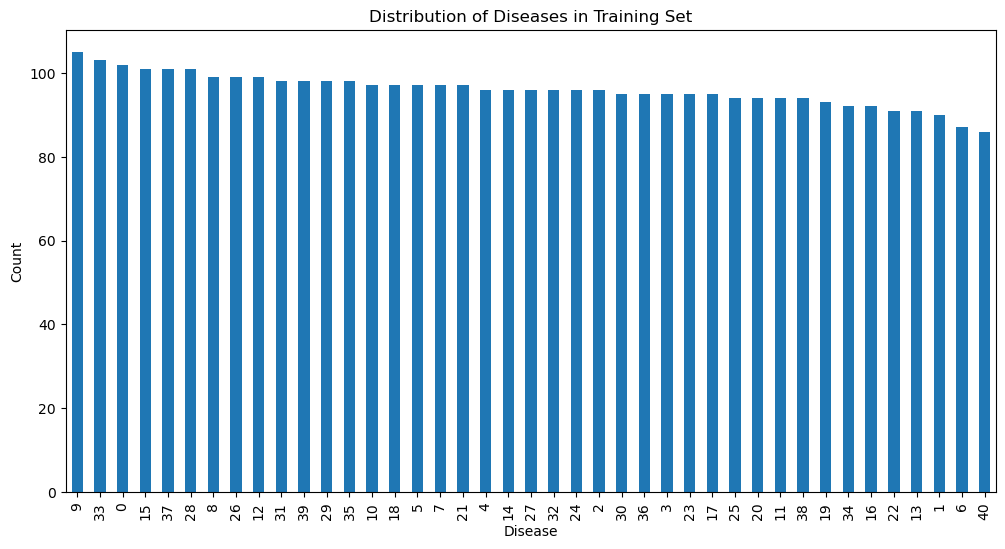

In [146]:
import matplotlib.pyplot as plt

# Check class distribution in the training set
y_train_counts = y_train.value_counts()
plt.figure(figsize=(12, 6))
y_train_counts.plot(kind='bar')
plt.title("Distribution of Diseases in Training Set")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.show()


## Feature importance

Feature ranking:
1. feature 97 (0.019903856580069237)
2. feature 25 (0.01691511844021799)
3. feature 14 (0.016447055694687893)
4. feature 0 (0.015792022365360963)
5. feature 6 (0.014932540011384872)
6. feature 56 (0.014739899652723822)
7. feature 33 (0.014714991804517458)
8. feature 34 (0.014652255933312115)
9. feature 39 (0.014618147370743401)
10. feature 98 (0.01360767722828313)
11. feature 86 (0.01349426608841975)
12. feature 109 (0.013424508539201699)
13. feature 40 (0.013418351541592415)
14. feature 93 (0.013270424226255122)
15. feature 11 (0.013270024170735823)
16. feature 41 (0.01295270523007412)
17. feature 19 (0.012653400606347908)
18. feature 106 (0.012435004194605047)
19. feature 28 (0.012082179564899256)
20. feature 43 (0.012007773127595997)
21. feature 83 (0.011619431097036712)
22. feature 102 (0.011373778075591307)
23. feature 99 (0.011204168424256913)
24. feature 129 (0.010911441828682924)
25. feature 63 (0.010842085500305526)
26. feature 7 (0.010774930510407805)
27. fea

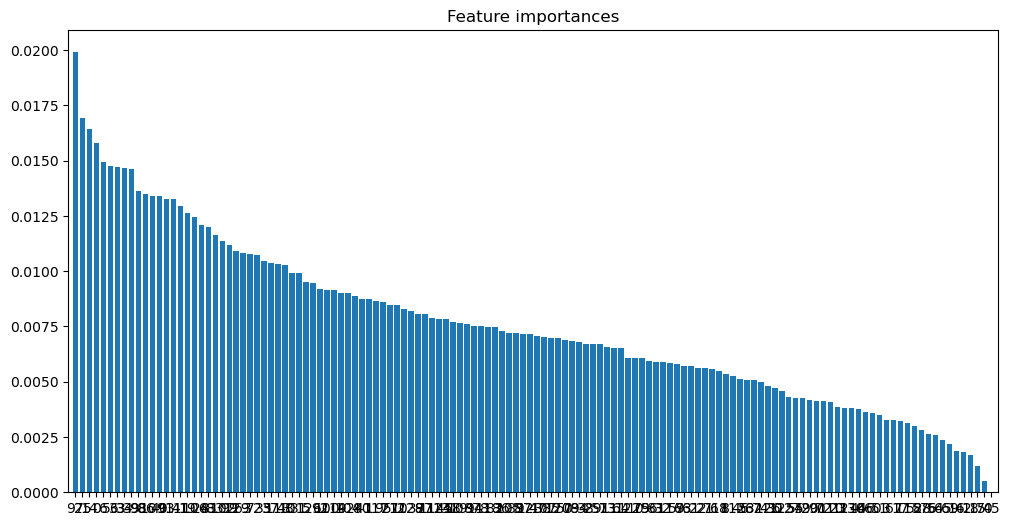

In [147]:
import matplotlib.pyplot as plt

# Get feature importances from the RandomForest model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train_noisy.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X_train_noisy.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_noisy.shape[1]), indices)
plt.xlim([-1, X_train_noisy.shape[1]])
plt.show()


## Recomendation system and prediction
### loading database & use logic for recommendations

In [135]:
sym_des = pd.read_csv('../datasets/symtoms_df.csv')
precautions = pd.read_csv('../datasets/precautions_df.csv')
workout = pd.read_csv("../datasets/workout_df.csv")
description = pd.read_csv("../datasets/description.csv")
medications = pd.read_csv("../datasets/medications.csv")
diets = pd.read_csv("../datasets/diets.csv")

In [136]:
import numpy as np
import pickle

# Load the saved RandomForest model
with open('best_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

#==========================helper functions================
def helper(dis):
    desc = description[description['Disease'] == dis]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis]['workout']

    return desc, pre, med, die, wrkout

# Symptom and Disease mappings
symptoms_dict = {
    'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 
    'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 
    'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 
    'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 
    'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 
    'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 
    'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 
    'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 
    'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 
    'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 
    'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 
    'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 
    'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 
    'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 
    'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 
    'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 
    'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 
    'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 
    'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 
    'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 
    'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 
    'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 
    'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 
    'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 
    'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 
    'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 
    'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 
    'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 
    'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131
}

diseases_list = {
    15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 
    33: 'Peptic ulcer disease', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 
    23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 
    28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'Hepatitis A', 
    19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 
    36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemorrhoids(piles)', 
    18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 
    31: 'Osteoarthritis', 5: 'Arthritis', 0: '(vertigo) Paroxysmal Positional Vertigo', 2: 'Acne', 
    38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'
}

# Model Prediction function using RandomForest
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    predicted_index = model.predict([input_vector])[0]
    return diseases_list[predicted_index]

## Prediction probabilities

In [145]:
import numpy as np
import pickle

# Load the saved RandomForest model
with open('best_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Function to get predicted probabilities
def get_predicted_probabilities(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    probabilities = model.predict_proba([input_vector])
    return probabilities

# Example symptoms
test_symptoms = [
    ['itching', 'skin_rash', 'nodal_skin_eruptions'],
    ['vomiting', 'fatigue', 'weight_loss'],
    ['high_fever', 'sweating', 'nausea'],
    ['cough', 'breathlessness', 'chest_pain']
]

# Get predictions for each set of symptoms
for symptoms in test_symptoms:
    probabilities = get_predicted_probabilities(symptoms)
    predicted_disease_index = np.argmax(probabilities)
    predicted_disease = diseases_list[predicted_disease_index]
    print(f"Symptoms: {symptoms}")
    print(f"Predicted Disease: {predicted_disease}")
    print(f"Predicted Probabilities: {probabilities}")
    print("-" * 50)


Symptoms: ['itching', 'skin_rash', 'nodal_skin_eruptions']
Predicted Disease: Acne
Predicted Probabilities: [[0.   0.02 0.24 0.   0.01 0.03 0.   0.02 0.   0.   0.   0.   0.01 0.04
  0.11 0.16 0.01 0.01 0.02 0.   0.   0.   0.   0.01 0.   0.   0.   0.13
  0.   0.   0.01 0.   0.02 0.   0.   0.13 0.   0.   0.02 0.   0.  ]]
--------------------------------------------------
Symptoms: ['vomiting', 'fatigue', 'weight_loss']
Predicted Disease: Varicose veins
Predicted Probabilities: [[0.03 0.02 0.01 0.03 0.   0.01 0.04 0.01 0.   0.02 0.   0.   0.   0.
  0.   0.   0.02 0.12 0.07 0.   0.06 0.08 0.   0.   0.02 0.   0.01 0.
  0.08 0.   0.   0.02 0.12 0.06 0.   0.   0.   0.03 0.01 0.13 0.  ]]
--------------------------------------------------
Symptoms: ['high_fever', 'sweating', 'nausea']
Predicted Disease: AIDS
Predicted Probabilities: [[0.12 0.22 0.03 0.   0.   0.03 0.04 0.   0.01 0.06 0.   0.   0.   0.02
  0.   0.02 0.   0.   0.   0.   0.14 0.   0.01 0.01 0.01 0.01 0.   0.11
  0.01 0.07 0.   0.0

In [144]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1
    
print("=================medications==================")
i = 1
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
i = 1
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
i = 1
for d_i in die:
    print(i, ": ", d_i)
    i += 1

Enter your symptoms.......muscle_wasting,irregular_sugar_level,fast_heart_rate,excessive_hunger
=================predicted disease============
Arthritis
=================description==================
Arthritis is inflammation of one or more joints, causing pain and stiffness.
=================precautions==================
1 :  exercise
2 :  use hot and cold therapy
3 :  try acupuncture
4 :  massage
=================medications==================
1 :  ['Vestibular rehabilitation', 'Canalith repositioning', 'Medications for nausea', 'Surgery', 'Home exercises']
=================workout==================
1 :  Consume anti-inflammatory foods
2 :  Include omega-3 fatty acids
3 :  Consume antioxidant-rich foods
4 :  Stay hydrated
5 :  Limit processed foods
6 :  Include vitamin K-rich foods
7 :  Consult a healthcare professional
8 :  Follow medical recommendations
9 :  Engage in low-impact exercise
10 :  Maintain a healthy weight
=================diets==================
1 :  ['Arthritis Diet',

In [138]:
import sklearn
print(sklearn.__version__)

1.4.2
